<a href="https://colab.research.google.com/github/kanikaghiloria/WDVPDatasetVisualisation/blob/master/WDVP_SmallCountries_GoodGovernment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install chart_studio

In [0]:
pip install bubbly

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from plotly.offline import plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
from bubbly.bubbly import bubbleplot 

In [0]:
directory_path = "/content/drive/My Drive/Colab Notebooks/Data Visualisation"

In [0]:
dataset_small_countries = pd.read_excel(directory_path + "/WDVP Datasets_small_countries.xlsx")
dataset_small_countries = dataset_small_countries.fillna("")
for cols in dataset_small_countries.columns[1:]:
  # print(cols)
  # dataframe = dataframe.rename(columns={(cols): (cols)+dataframe.loc[2,cols] })
  temp = cols + " " + dataset_small_countries.loc[2,cols]
  dataset_small_countries = dataset_small_countries.rename(columns={cols:temp})
    # print (temp)
dataset_small_countries = dataset_small_countries.rename(columns={'GDP.1 per capita (PPP)':'GDP per capita (PPP)'})
dataset_small_countries = dataset_small_countries.drop(dataset_small_countries.index[[0,1,2,3]])
dataset_small_countries= dataset_small_countries.drop(['GDP per km2 (PPP)' ], axis=1)
dataset_small_countries = dataset_small_countries.reset_index(drop=True)
for cols in dataset_small_countries.columns[1:]:
  dataset_small_countries[cols] = pd.to_numeric(dataset_small_countries[cols], downcast='float', errors='coerce')
dataset_small_countries = dataset_small_countries[dataset_small_countries['GDP per capita (PPP)'] < 100000]
dataset_small_countries.head()

,indicator,population,"GDP (billions, PPP)",GDP per capita (PPP),land area (sq km),population density (people per sq km land area),total foreign-born\npopulation,% foreign-born population,population living abroad (diaspora),population living abroad %,happy planet index,world happiness report score,human development index,health expenditure per capita (current international $),education expenditure current US$ per capita
0,Albania,2900000.0,34.200001,11840.200195,27398.0,104.870697,57616.0,3.100000,1122910.0,27.940001,20.200001,4.639548,0.785,774.0,NaN
2,Armenia,3000000.0,25.799999,8621.000000,28203.0,102.931152,191199.0,10.600000,937299.0,23.700001,25.700001,4.287736,0.755,883.0,89.770775
3,Bahamas,400000.0,9.000000,24555.199219,10010.0,39.496605,59306.0,16.299999,40095.0,9.350000,NaN,NaN,0.807,1699.0,NaN
4,Bahrain,1300000.0,66.900002,50704.101562,760.0,1935.906616,704137.0,54.700001,55964.0,4.000000,NaN,6.227321,0.846,2453.0,616.454834
5,Barbados,300000.0,4.800000,17100.199219,430.0,664.462769,34475.0,11.300000,98464.0,26.160000,NaN,NaN,0.800,1234.0,1013.014160


In [0]:
dataset_good_government = pd.read_excel(directory_path + "/WDVP Datasets_good_government.xlsx")
dataset_good_government = dataset_good_government.fillna("")
dataset_good_government= dataset_good_government.drop(dataset_good_government.index[[0,1,2,3]])
# dataset_good_government= dataset_good_government.drop(['Unnamed: 4','Unnamed: 10','Unnamed: 22','ISO Country code','GDP per capita (PPP)','GDP growth\n(annual %)','health expenditure \nper person','education expenditure \nper person ','school life expectancy (YEARS)','government expenditure (% of GDP)','regulatory quality','rule of law','government integrity score','property rights score','financial freedom score','overall economic freedom score','women MPs (% of all MPs)','tax burden score'], axis=1)
dataset_good_government= dataset_good_government.drop(['Unnamed: 4','Unnamed: 10','Unnamed: 22','ISO Country code','GDP growth\n(annual %)', 'health expenditure \n% of GDP','education expenditure\n% of GDP','government expenditure (% of GDP)','surface area (Km2)', 'GINI index'], axis=1)
for cols in dataset_good_government.columns[1:]:
  dataset_good_government[cols] = pd.to_numeric(dataset_good_government[cols], downcast='float', errors='coerce')
dataset_good_government = dataset_good_government[dataset_good_government['GDP per capita (PPP)'] < 80000]
dataset_good_government = dataset_good_government.reset_index(drop=True)
dataset_good_government.head()

,indicator,population,happy planet index,human development index,world happiness report score,sustainable economic development assessment (SEDA),GDP \n(billions PPP),GDP per capita (PPP),health expenditure \nper person,education expenditure \nper person,school life expectancy (YEARS),unemployment (%),government spending score,political rights score,civil liberties score,political stability & absence of violence,government effectiveness,regulatory quality,rule of law,control of corruption,judicial effectiveness score,government integrity score,property rights score,tax burden score,overall economic freedom score,financial freedom score,women MPs (% of all MPs)
0,Afghanistan,36000000.0,20.200001,0.498,2.661718,NaN,64.099998,1919.0,184.0,23.789251,11.0,8.500000,79.300003,5.0,6.0,-2.78,-1.33,-1.34,-1.57,-1.52,28.200001,26.200001,17.900000,91.800003,51.299999,10.0,27.700001
1,Albania,2900000.0,36.799999,0.785,4.639548,53.099998,34.200001,11840.0,774.0,NaN,16.0,16.299999,72.699997,3.0,3.0,0.40,0.08,0.22,-0.40,-0.42,25.400000,39.900002,54.099998,85.099998,64.500000,70.0,27.900000
2,Algeria,41000000.0,33.299999,0.754,5.248912,45.799999,612.500000,15027.0,1031.0,NaN,14.0,11.200000,45.900002,6.0,5.0,-0.96,-0.60,-1.20,-0.86,-0.61,35.200001,29.000000,27.799999,74.000000,44.700001,30.0,25.799999
3,Angola,30000000.0,NaN,0.581,NaN,28.400000,187.300003,6844.0,196.0,NaN,10.0,6.600000,69.099998,6.0,6.0,-0.29,-1.03,-1.04,-1.10,-1.41,25.400000,18.900000,36.000000,82.400002,48.599998,40.0,38.200001
4,Argentina,44000000.0,35.200001,0.825,6.039330,57.299999,874.099976,20048.0,1390.0,656.522522,17.0,6.600000,55.599998,2.0,2.0,0.18,0.16,-0.29,-0.25,-0.26,44.500000,32.599998,40.799999,65.699997,52.299999,60.0,38.900002


In [0]:
dataset_good_government_correlation = dataset_good_government[1:].corr()
dataset_good_government_correlation

,population,happy planet index,human development index,world happiness report score,sustainable economic development assessment (SEDA),GDP \n(billions PPP),GDP per capita (PPP),health expenditure \nper person,education expenditure \nper person,school life expectancy (YEARS),unemployment (%),government spending score,political rights score,civil liberties score,political stability & absence of violence,government effectiveness,regulatory quality,rule of law,control of corruption,judicial effectiveness score,government integrity score,property rights score,tax burden score,overall economic freedom score,financial freedom score,women MPs (% of all MPs)
population,1.000000,0.059396,0.001599,-0.105217,-0.062390,0.793357,-0.027024,-0.000890,0.033355,-0.023248,-0.127752,0.103082,0.064323,0.091033,-0.146863,0.045812,-0.012282,-0.008924,-0.040216,0.080612,0.018755,0.004298,-0.039041,-0.048012,-0.086164,-0.029639
happy planet index,0.059396,1.000000,0.370253,0.430589,0.314664,0.023214,0.192740,0.175645,0.227650,0.362517,-0.140670,-0.010273,-0.281495,-0.236639,0.165159,0.264692,0.236211,0.208604,0.187889,0.158630,0.206687,0.252832,0.039109,0.257130,0.218200,0.144753
human development index,0.001599,0.370253,1.000000,0.772502,0.935764,0.194126,0.790114,0.740623,0.664244,0.904743,-0.021008,-0.468673,-0.473455,-0.514643,0.570978,0.823382,0.764520,0.732823,0.681893,0.634456,0.666235,0.752721,-0.091195,0.654706,0.601438,0.211102
world happiness report score,-0.105217,0.430589,0.772502,1.000000,0.824408,0.100301,0.758568,0.737745,0.745134,0.711061,-0.202294,-0.477764,-0.500468,-0.526061,0.583411,0.755023,0.732443,0.700023,0.694590,0.638160,0.680976,0.741582,-0.211830,0.678872,0.605303,0.357441
sustainable economic development assessment (SEDA),-0.062390,0.314664,0.935764,0.824408,1.000000,0.156908,0.873964,0.841065,0.793320,0.914595,-0.077915,-0.643634,-0.584320,-0.649979,0.727345,0.921709,0.883631,0.877641,0.841439,0.776447,0.817059,0.866629,-0.182784,0.740984,0.669867,0.225546
GDP \n(billions PPP),0.793357,0.023214,0.194126,0.100301,0.156908,1.000000,0.201000,0.326161,0.240885,0.157567,-0.123931,-0.020430,-0.005506,-0.024839,-0.004951,0.222406,0.173202,0.166620,0.130607,0.230219,0.190024,0.169637,-0.124948,0.113654,0.070907,0.011320
GDP per capita (PPP),-0.027024,0.192740,0.790114,0.758568,0.873964,0.201000,1.000000,0.866565,0.831863,0.743711,-0.147811,-0.426002,-0.298066,-0.353026,0.487013,0.772838,0.741744,0.726186,0.677576,0.665065,0.716054,0.717274,-0.162775,0.610355,0.593045,0.174739
health expenditure \nper person,-0.000890,0.175645,0.740623,0.737745,0.841065,0.326161,0.866565,1.000000,0.868687,0.704796,-0.100867,-0.502765,-0.433660,-0.495549,0.485949,0.792039,0.782574,0.779073,0.740373,0.694715,0.776991,0.743405,-0.379521,0.624665,0.624297,0.287391
education expenditure \nper person,0.033355,0.227650,0.664244,0.745134,0.793320,0.240885,0.831863,0.868687,1.000000,0.667185,-0.069189,-0.630603,-0.465460,-0.526950,0.502303,0.806140,0.793094,0.805462,0.799261,0.771834,0.837243,0.750652,-0.607921,0.629199,0.584658,0.436254
school life expectancy (YEARS),-0.023248,0.362517,0.904743,0.711061,0.914595,0.157567,0.743711,0.704796,0.667185,1.000000,0.002385,-0.533716,-0.579681,-0.625282,0.648103,0.818516,0.755015,0.750278,0.727239,0.699597,0.701849,0.757466,-0.192141,0.631902,0.560520,0.256506


In [0]:
dataset_good_government.columns

Index(['indicator', 'population', 'happy planet index',
       'human development index', 'world happiness report score',
       'sustainable economic development assessment (SEDA)',
       'GDP \n(billions PPP)', 'GDP per capita (PPP)',
       'health expenditure \nper person',
       'education expenditure \nper person ', 'school life expectancy (YEARS)',
       'unemployment (%)', 'government spending score',
       'political rights score ', 'civil liberties score ',
       'political stability & absence of violence', 'government effectiveness',
       'regulatory quality', 'rule of law', 'control of corruption',
       'judicial effectiveness score', 'government integrity score',
       'property rights score', 'tax burden score',
       'overall economic freedom score', 'financial freedom score',
       'women MPs (% of all MPs)'],
      dtype='object')

In [0]:
figure_gdp = bubbleplot(dataset=dataset_good_government, x_column='health expenditure \nper person', y_column='school life expectancy (YEARS)', 
    bubble_column='indicator', color_column='GDP per capita (PPP)', size_column='population', 
    x_title='health expenditure \nper person', y_title='school life expectancy (YEARS)', title='Impact of Population (size of bubbles), School life Expectancy' + '<br>' + '& health Expenditure on GDP',
    x_logscale=True, scale_bubble=3,colorbar_title='GDP per capita (PPP)')
# iplot(figure_gdp, config=config)

In [0]:
figure_hdi = bubbleplot(dataset=dataset_good_government, x_column='health expenditure \nper person', y_column='school life expectancy (YEARS)', 
    bubble_column='indicator', color_column='human development index', size_column='population', 
    x_title='health expenditure \nper person', y_title='school life expectancy (YEARS)', title='Impact of Population (size of bubbles), School life Expectancy' + '<br>' + '& health Expenditure on Human Development Index',
    x_logscale=True, scale_bubble=3,colorbar_title='Human Development Index')
# iplot(figure_hdi, config=config)

In [0]:
figure_hpi = bubbleplot(dataset=dataset_good_government, x_column='health expenditure \nper person', y_column='school life expectancy (YEARS)', 
    bubble_column='indicator', color_column='happy planet index', size_column='population', 
    x_title='health expenditure \nper person', y_title='school life expectancy (YEARS)', title='Impact of Population (size of bubbles), School life Expectancy' + '<br>' + '& health Expenditure on Happy Planet Index',
    x_logscale=True, scale_bubble=3,colorbar_title='happy planet index')
# iplot(figure_hpi, config=config)

In [0]:
data_small_countries_hdi = dict(type= 'choropleth',
            locations = dataset_small_countries['indicator'],
            locationmode='country names',
            autocolorscale = False,
            colorscale = 'Portland',
            # colorscale = 'tealrose',
            z=dataset_small_countries['human development index '],
            text=dataset_small_countries['indicator'],
            colorbar={'title':'human development index '},
            reversescale = False,
            marker = dict(
                line = dict(
                    color = 'rgb(180,180,180)',
                    width=0.5
                )
            ))

data_good_government_population = dict(type='choropleth',
                                       locations = dataset_good_government['indicator'],
                                       locationmode='country names',
                                       autocolorscale = True,
                                      #  colorscale = 'agsunset',
                                       colorscale = 'Viridis',
                                       z=dataset_good_government['population'],
                                       text=dataset_good_government['indicator'],
                                       colorbar={'title': 'Population'},
                                        marker = dict(
                                            line = dict(
                                                color = 'rgb(180,180,180)',
                                                width=0.5
                                                )
                                            )
                                        )

data_good_government_hpi = dict(type='choropleth',
                                locations = dataset_good_government['indicator'],
                                locationmode='country names',
                                autocolorscale = False,
                                colorscale = 'agsunset',
                                z=dataset_good_government['happy planet index'],
                                text=dataset_good_government['indicator'],
                                colorbar={'title': 'happy planet index'},
                                marker = dict(
                                    line = dict(
                                        color = 'rgb(180,180,180)',
                                        width=0.5
                                        )
                                    )
                                )
data_good_government_hdi = dict(type='choropleth',
                                       locations = dataset_good_government['indicator'],
                                       locationmode='country names',
                                       autocolorscale = False,
                                       colorscale = 'armyrose',
                                       z=dataset_good_government['human development index'],
                                       text=dataset_good_government['indicator'],
                                       colorbar={'title': 'Human development index'},
                                        marker = dict(
                                            line = dict(
                                                color = 'rgb(180,180,180)',
                                                width=0.5
                                                )
                                            )
                                        )

data_good_government_gdp = dict(type= 'choropleth',
            locations = dataset_good_government['indicator'],
            locationmode='country names',
            autocolorscale = False,
            colorscale = 'tealrose',
            z=dataset_good_government['GDP per capita (PPP)'],
            text=dataset_good_government['indicator'],
            colorbar={'title':'GDP per capita (PPP)'},
            reversescale = False,
            marker = dict(
                line = dict(
                    color = 'rgb(180,180,180)',
                    width=0.5
                )
            ))
# layout_good_government = dict(title=columns_good_government[7],
#               geo = dict(scope='world',
#                         #  showframe=False,
#                          showcountries=True,
#                          showland=False,
#                         #  showocean=True,
#                          showrivers=True,
#                         #  projection = {'type': 'natural earth'}
#                         #  projection = {'type': 'orthographic'}
#                          projection = {'type': 'mollweide'}
#                          ))

# map_good_government = go.Figure(data = [data_good_government_gdp], layout=layout_good_government)
# iplot(map_good_government)

In [0]:
updatemenus = list([dict(buttons=list()), 
                    dict(direction='down',
                         showactive=True)])

In [0]:
vis_list = [[True, False, False, False, False], [False, True, False, False, False], [False, False, True, False, False], [False, False,  False,True, False],
            [False, False, False, False, True,]]
mapslist = ['GDP','Population', 'HDI - All Countries', 'HDI - Small Countries', 'Happy Planet Index']
title = ['GDP per Capita of Countries','Population of Countries', 'Human Development Index (healthy life + knowledge + standard of living) of All Countries', 
            'Human Development Index of Small Countries', 'Happy Planet Index (well being + life expectancy + inequalities + ecological footprint)']
datalist = [data_good_government_gdp, data_good_government_population, data_good_government_hdi, data_small_countries_hdi, data_good_government_hpi]

In [0]:
for s in range(0,len(mapslist)):
    updatemenus[0]['buttons'].append(dict(args=[{'visible': vis_list[s]}, {'title': title[s]}],
                                          label=mapslist[s],
                                          method='update'))

In [0]:
config = dict({'scrollZoom': True, 'displayModeBar': True})

In [0]:
layout = dict(
    # title='Relative Strength Of The Political Parties In Dusseldorf',
    font=dict(family='Arial Black'),
    # autosize=False,
    # width=900,
    # height=900,
    hovermode='closest',
    template="ggplot2",
    geo = dict(
        scope='world',
        #  showframe=False,
        showcountries=True,
        showland=False,
         showocean=True,
        showrivers=True,
        oceancolor = 'aliceblue',
        showcoastlines=True,
        # framecolor = 'red',
        # countrywidth=2,
        # coastlinecolor='red',
        #  projection = {'type': 'natural earth'}
        #  projection = {'type': 'orthographic'}
        projection = {'type': 'mollweide'}
        )
    )
layout['updatemenus'] = updatemenus
fig_choropleth = dict(data=datalist, layout=layout)
iplot({'data': datalist,'layout': layout}, validate=True)

In [0]:
figures_list = [figure_gdp, figure_hdi, figure_hpi, fig_choropleth]

In [0]:
def figures_to_html(figs, filename):
    '''Saves a list of plotly figures in an html file.

    Parameters
    ----------
    figs : list[plotly.graph_objects.Figure]
        List of plotly figures to be saved.

    filename : str
        File name to save in.

    '''
    import plotly.offline as pyo
    s = '''<html><head>
        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/css/bootstrap.min.css">
        <style>body{ margin:0 100; background:whitesmoke; }</style>
    </head><body><h1>Measures for growth across Countries</h1> '''

    dashboard = open(filename, 'w')
    # dashboard.write("<html><head>Measures for growth across Countries</head><body>" + "\n" + "\n")
    dashboard.write(s + "\n" + "\n" + "\n")
    # fig_hm

    add_js = True
    for fig in figs:

        inner_html = pyo.plot(fig, include_plotlyjs=add_js, output_type='div', config=config)
        dashboard.write("\n")
        dashboard.write(inner_html)
        dashboard.write("\n")
        add_js = False

    dashboard.write("</body></html>" + "\n")

figures_to_html(figures_list, directory_path + '/A3_GhiloriaKanika_18315430.html')

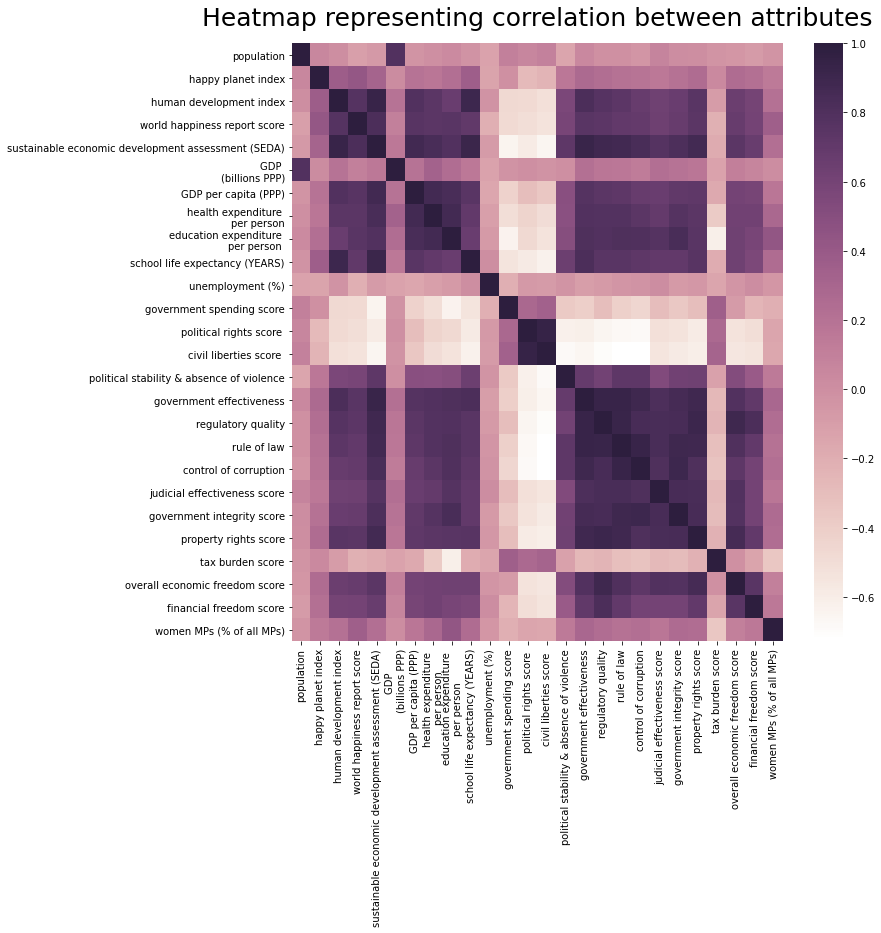

In [0]:
cmap = sns.cubehelix_palette(light=1, as_cmap =True)
plt.figure(figsize=(11,11))
plt.title("Heatmap representing correlation between attributes", fontsize=25, y=1.02)
fig_hm = sns.heatmap(dataset_good_government_correlation, square=False,cmap=cmap)
plt.savefig('heatmap')

In [0]:
iplot(figure_gdp, config=config)
iplot(figure_hdi, config=config)
iplot(figure_hpi, config=config)
iplot(fig_choropleth, config)